<a href="https://colab.research.google.com/github/julianovale/PO240_Meta_heuristica/blob/main/PO240_Semana05c.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo de designação

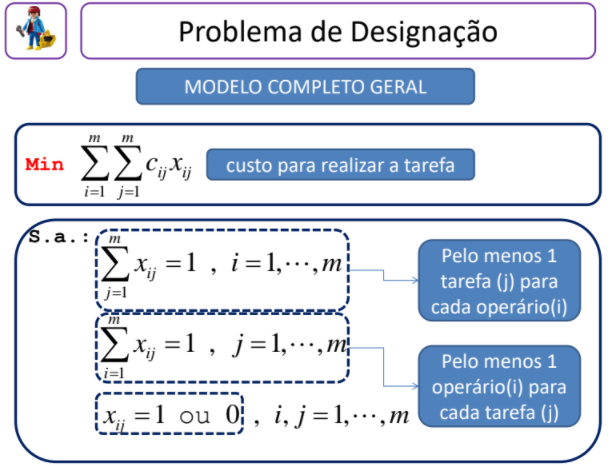

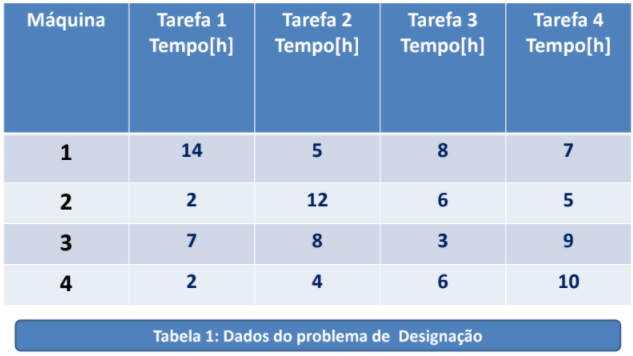

In [11]:
# instalação e importação = rodar 2 vezes
! pip install ortools
from ortools.linear_solver import pywraplp

In [14]:
costs = [[14,5,8,7], # tempo
         [2,12,6,5],
         [7,8,3,9],
         [2,4,6,10]] 
f = [1, 1, 1, 1] # máquinas (alocação)
d = [1, 1, 1, 1] # tarefas (alocação)

num_maquinas = len(costs)
num_tarefas = len(costs[0])

solver = pywraplp.Solver('Modelo de Designação',
                         pywraplp.Solver.GLOP_LINEAR_PROGRAMMING)

# variáveis
x = {}
for i in range(num_maquinas):
  for j in range(num_tarefas):
    x[i, j] = solver.NumVar(0, solver.infinity(), '')

# restrições
for i in range(num_maquinas):
  solver.Add(solver.Sum([x[i, j] for j in range(num_tarefas)]) <= f[i], name= 'RFab'+str(i))

for j in range(num_tarefas):
  solver.Add(solver.Sum([x[i, j] for i in range(num_maquinas)]) == d[j], name= 'RFab'+str(i))

# função objetivo
objective_terms = []
for i in range(num_maquinas):
  for j in range(num_tarefas):
    objective_terms.append(costs[i][j] * x[i, j])
solver.Minimize(solver.Sum(objective_terms))

# resolver
status = solver.Solve()

# relatório
if status == pywraplp.Solver.OPTIMAL or status == pywraplp.Solver.FEASIBLE:
  print('Custo total: ', solver.Objective().Value(), '\n')
  for i in range(num_maquinas):
    for j in range(num_tarefas):
      if x[i, j].solution_value() > 0.01:
        print('Máquina %d - Tarefa %d - Custo total: %5.2f' % (i+1,j+1, costs[i][j]*x[i,j].solution_value()))

Custo total:  15.0 

Máquina 1 - Tarefa 2 - Custo total:  5.00
Máquina 2 - Tarefa 4 - Custo total:  5.00
Máquina 3 - Tarefa 3 - Custo total:  3.00
Máquina 4 - Tarefa 1 - Custo total:  2.00


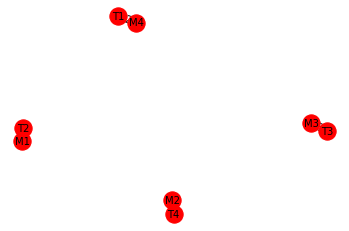

In [21]:
# Criação do grafo

# importando bibliotecas
import networkx as nx
import matplotlib.pyplot as plt

# cria o grafo vazio
G = nx.Graph()

# adiciona os nós das fábricas
for i in range(num_maquinas):
  node = 'M'+str(i+1)
  G.add_node(node, size=10, label=node)

# adiciona os nós dos tarefas
for j in range(num_tarefas):
  node = 'T'+str(j+1)
  G.add_node(node, size=10, label=node)

# adiciona os arcos
for i in range(num_maquinas):
  for j in range(num_tarefas):
     if (x[i, j].solution_value()>0):
      G.add_edge('M'+str(i+1), 'T'+str(j+1), element=str(costs[i][j]))

# criando ambiente
pos = nx.spring_layout(G)
edge_labels = dict([((u, v), G.get_edge_data(u, v)['element']) for u, v in G.edges])
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)
nx.draw(G, pos, font_size=10, node_color='red', edge_color='blue', with_labels=True)